# IMPORTS

In [1]:

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [2]:
#Função de auxilio para printar o dado

def plot_multi(i):
    '''Plots 16 digits, starting with digit i'''
    nplots = 16
    fig = plt.figure(figsize=(15,15))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        plt.imshow(digits.images[i+j], cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    plt.show()

# Entendimento do dado

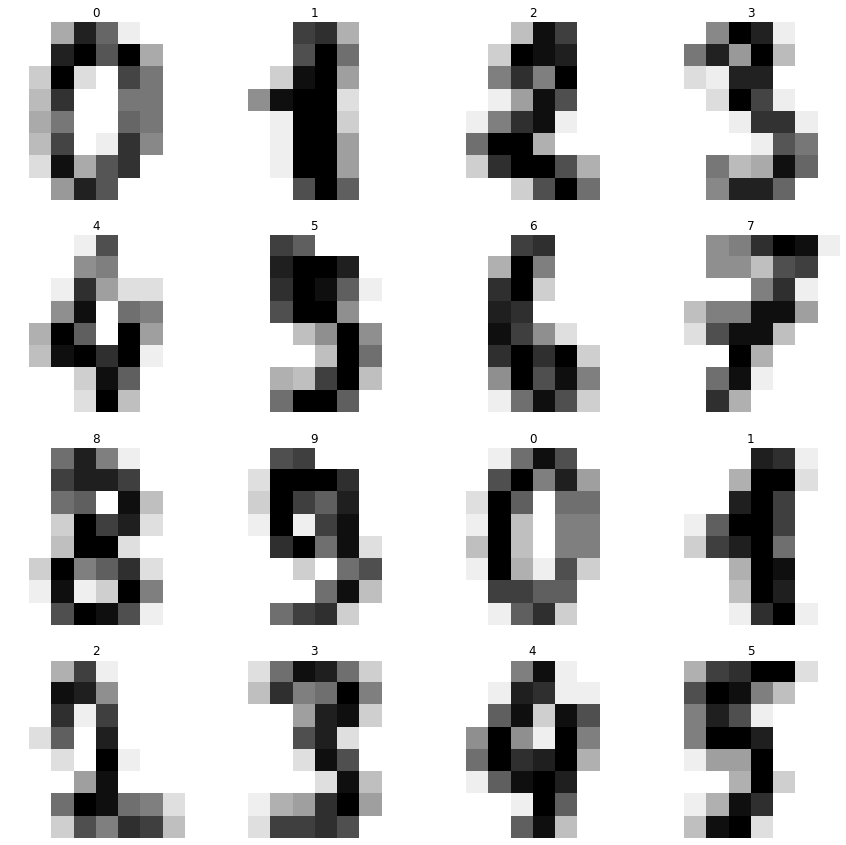

In [3]:
digits = datasets.load_digits()
plot_multi(0)

# Tratamento do dado

In [4]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
x_train, x_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Treino do primeiro modelo
## C-Support Vector Classification

In [5]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001, C=100)

# Learn the digits on the train subset
clf.fit(x_train, y_train)

# Predict the value of the digit on the test subset
predicted_clf = clf.predict(x_test)

## Resultados do primeiro modelo

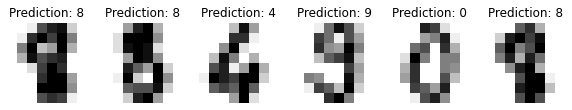

In [6]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for ax, image, prediction in zip(axes, x_test, predicted_clf):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [7]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted_clf)}\n")

Classification report for classifier SVC(C=100, gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.96      0.97        91
           2       0.99      0.99      0.99        86
           3       0.98      0.90      0.94        91
           4       0.99      0.96      0.97        92
           5       0.95      0.96      0.95        91
           6       0.99      0.99      0.99        91
           7       0.98      0.99      0.98        89
           8       0.94      1.00      0.97        88
           9       0.92      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




In [8]:
metrics.accuracy_score(y_test, predicted_clf)

0.9699666295884316

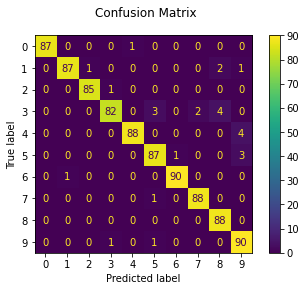

In [9]:
disp = metrics.plot_confusion_matrix(clf, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

# Treino do segundo modelo
## Multi-layer Perceptron classifier

In [10]:
mlp = MLPClassifier(hidden_layer_sizes=(15,), activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True)

mlp.fit(x_train,y_train)

predicted_mlp = mlp.predict(x_test)

Iteration 1, loss = 2.25166741
Iteration 2, loss = 1.92625550
Iteration 3, loss = 1.64401782
Iteration 4, loss = 1.33795211
Iteration 5, loss = 1.06279849
Iteration 6, loss = 0.84214768
Iteration 7, loss = 0.67695986
Iteration 8, loss = 0.55457601
Iteration 9, loss = 0.45818499
Iteration 10, loss = 0.39062026
Iteration 11, loss = 0.33110794
Iteration 12, loss = 0.29293844
Iteration 13, loss = 0.26481023
Iteration 14, loss = 0.22485706
Iteration 15, loss = 0.20027397
Iteration 16, loss = 0.17860742
Iteration 17, loss = 0.16187474
Iteration 18, loss = 0.14945917
Iteration 19, loss = 0.14095293
Iteration 20, loss = 0.12928683
Iteration 21, loss = 0.12801227
Iteration 22, loss = 0.11151617
Iteration 23, loss = 0.10463400
Iteration 24, loss = 0.10072982
Iteration 25, loss = 0.09194901
Iteration 26, loss = 0.08858409
Iteration 27, loss = 0.08404859
Iteration 28, loss = 0.07931319
Iteration 29, loss = 0.07491209
Iteration 30, loss = 0.07252041
Iteration 31, loss = 0.07008570
Iteration 32, los

## Resultados do segundo modelo

In [11]:
print(f"Classification report for classifier {mlp}:\n"
      f"{metrics.classification_report(y_test, predicted_mlp)}\n")

Classification report for classifier MLPClassifier(activation='logistic', hidden_layer_sizes=(15,),
              learning_rate_init=0.1, random_state=1, solver='sgd',
              verbose=True):
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        88
           1       0.91      0.86      0.88        91
           2       0.95      0.91      0.93        86
           3       0.86      0.81      0.84        91
           4       0.98      0.93      0.96        92
           5       0.83      0.95      0.89        91
           6       0.97      0.99      0.98        91
           7       0.95      0.90      0.92        89
           8       0.90      0.86      0.88        88
           9       0.78      0.90      0.84        92

    accuracy                           0.91       899
   macro avg       0.91      0.91      0.91       899
weighted avg       0.91      0.91      0.91       899




In [12]:
metrics.accuracy_score(y_test, predicted_mlp)

0.9054505005561735

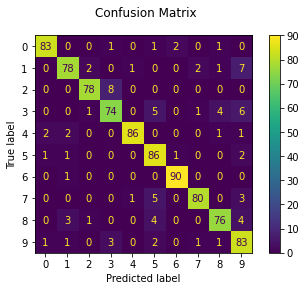

In [13]:
disp = metrics.plot_confusion_matrix(mlp, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

# Conclusões
### Lorem ipsum

# Referências
https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py <br>
https://medium.com/@navyashree.raghupatro/recognizing-handwritten-digits-with-scikit-learn-8d248dc01b6d <br>
https://thedatafrog.com/en/articles/handwritten-digit-recognition-scikit-learn/ <br>